In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

recipes_df = pd.read_csv('Processed_Recipes_Dataset.csv')
reviews_df = pd.read_csv('Processed_Reviews_Dataset.csv')

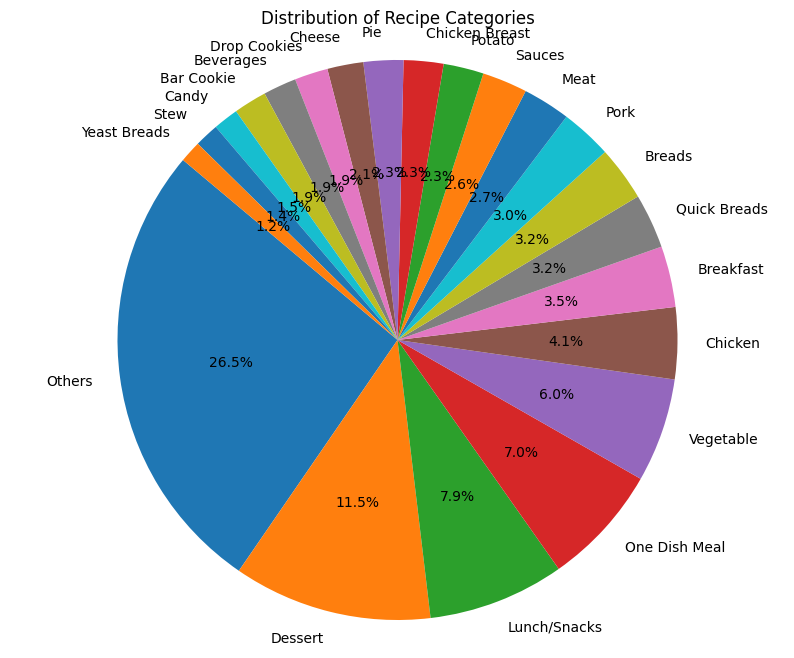

In [43]:
category_counts = recipes_df['RecipeCategory'].value_counts()

threshold = len(recipes_df) * 0.01
rare_categories = category_counts[category_counts < threshold].index

recipes_df['RecipeCategory'] = recipes_df['RecipeCategory'].apply(lambda x: 'Others' if x in rare_categories else x)

category_counts = recipes_df['RecipeCategory'].value_counts()

plt.figure(figsize=(10, 8))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Recipe Categories')
plt.axis('equal')
plt.show()


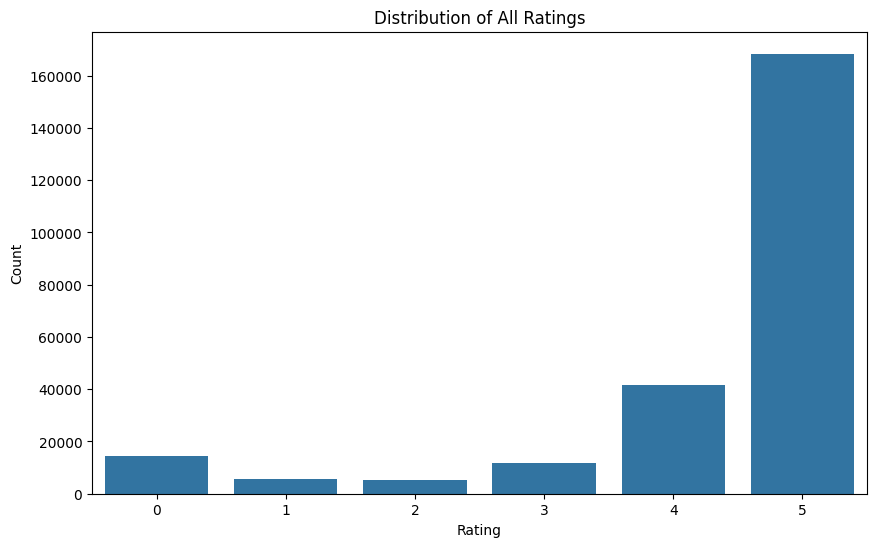

In [67]:
# Visualization: Distribution of All Ratings (Bar Graph)
plt.figure(figsize=(10, 6))
sns.countplot(x='Rating', data=reviews_df)
plt.title('Distribution of All Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()


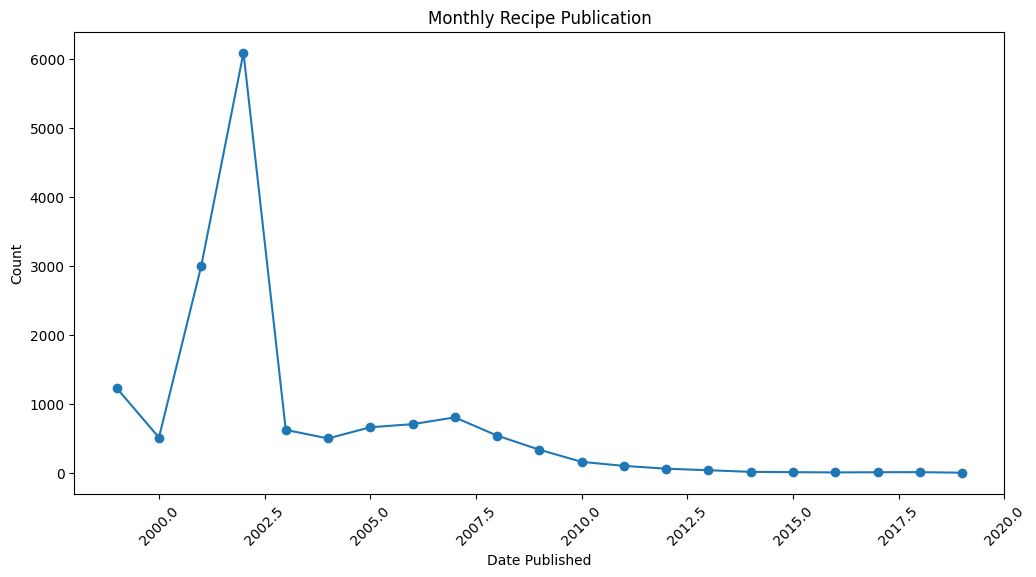

In [46]:
plt.figure(figsize=(12, 6))
monthly_publication = recipes_df['DatePublished'].value_counts().sort_index()
monthly_publication.plot(kind='line', marker='o')
plt.title('Monthly Recipe Publication')
plt.xlabel('Date Published')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

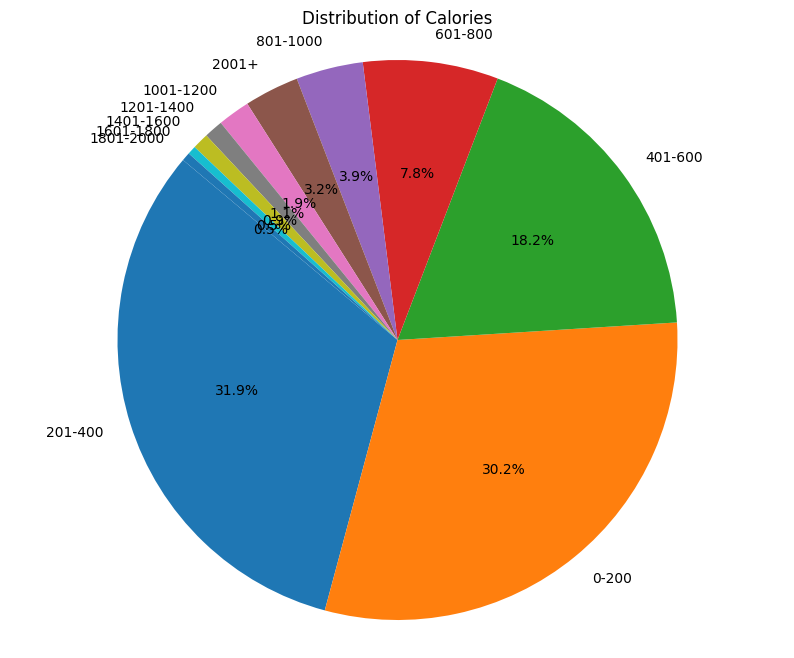

In [60]:
# Define calorie ranges
calorie_bins = [0, 200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000, float('inf')]
calorie_labels = ['0-200', '201-400', '401-600', '601-800', '801-1000', '1001-1200', '1201-1400', 
                  '1401-1600', '1601-1800', '1801-2000', '2001+']

# Categorize recipes into calorie ranges
recipes_df['CalorieRange'] = pd.cut(recipes_df['Calories'], bins=calorie_bins, labels=calorie_labels, right=False)

# Calculate the counts for each calorie range
calorie_counts = recipes_df['CalorieRange'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(10, 8))
plt.pie(calorie_counts, labels=calorie_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Calories')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()


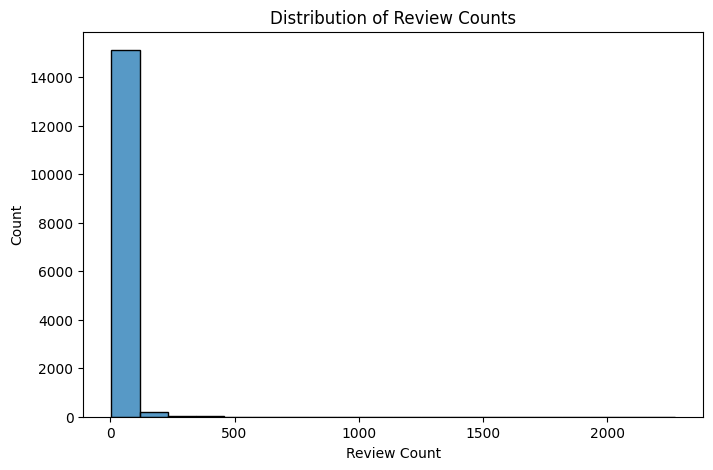

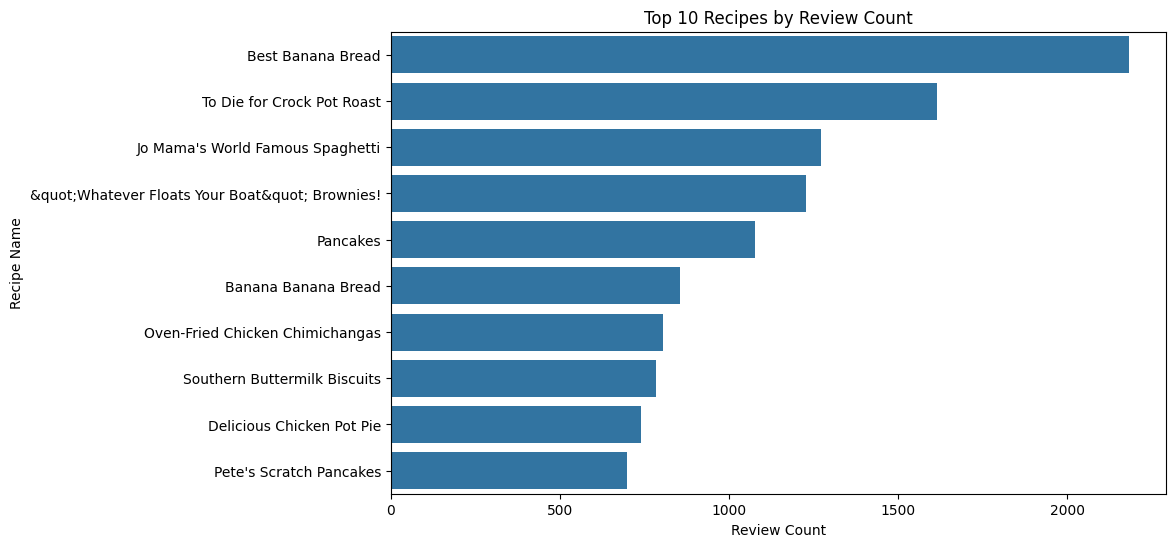

In [72]:
merged_data = pd.merge(recipes_df, reviews_df, on='RecipeId')

top_recipes = merged_data.groupby('Name').agg({'ReviewId': 'count', 'Rating': 'mean'}).reset_index()
top_recipes.columns = ['Recipe Name', 'Review Count', 'Average Rating']

top_10_recipes = top_recipes.nlargest(10, 'Review Count')

plt.figure(figsize=(10, 6))
sns.barplot(x='Review Count', y='Recipe Name', data=top_10_recipes)
plt.title('Top 10 Recipes by Review Count')
plt.xlabel('Review Count')
plt.ylabel('Recipe Name')
plt.show()


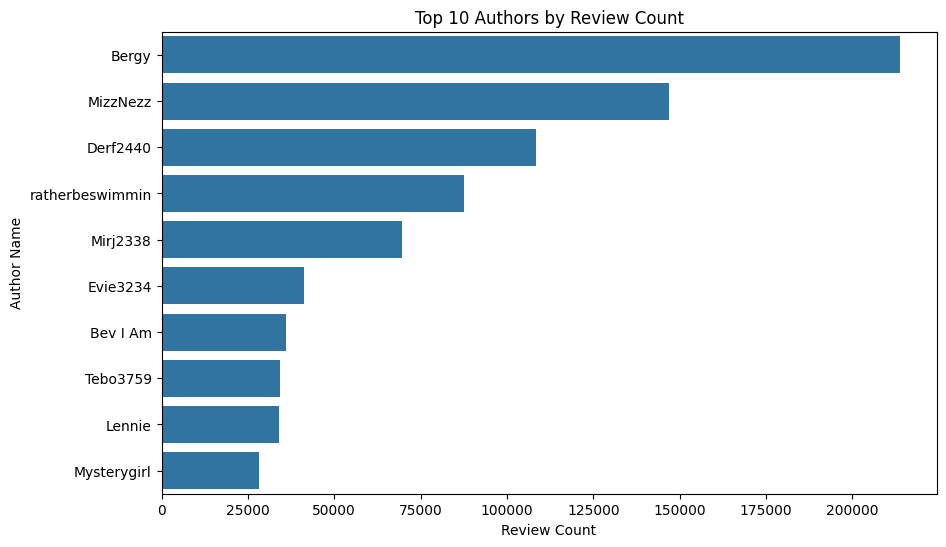

In [80]:
author_column = 'AuthorName_x' if 'AuthorName_x' in merged_data.columns else 'AuthorName_y'

top_authors = merged_data.groupby(author_column).agg({'ReviewId': 'count', 'Rating': 'mean'}).reset_index()
top_authors.columns = ['Author Name', 'Review Count', 'Average Rating']

top_10_authors = top_authors.nlargest(10, 'Review Count')

# Plotting the top 10 authors
plt.figure(figsize=(10, 6))
sns.barplot(x='Review Count', y='Author Name', data=top_10_authors)
plt.title('Top 10 Authors by Review Count')
plt.xlabel('Review Count')
plt.ylabel('Author Name')
plt.show()